In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Block 1: Import Libraries and Load Data


In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

# Load data and ensure 'prognosis' is the first column
data = pd.read_csv("/content/drive/My Drive/Training.csv").dropna(axis=1)
test_data = pd.read_csv("/content/drive/My Drive/Testing.csv").dropna(axis=1)

# Move 'prognosis' to the first column
columns = list(data.columns)
columns.remove("prognosis")
columns = ["prognosis"] + columns
data = data[columns]

# Encode the target variable 'prognosis' and store it in a new column
encoder = LabelEncoder()

# Correctly update 'encoded_prognosis' using .loc to avoid the SettingWithCopyWarning
data.loc[:, "encoded_prognosis"] = encoder.fit_transform(data["prognosis"])


Block 2: Display Prognosis Distribution



In [42]:
# Display the unique prognoses and their counts
prognosis_counts = data["prognosis"].value_counts()

# Create an interactive bar chart
fig = px.bar(
    x=prognosis_counts.index,
    y=prognosis_counts.values,
    labels={"x": "Prognosis", "y": "Number of Cases"},
    title="Distribution of Prognosis in Training Data",
    text=prognosis_counts.values,
    color=prognosis_counts.values
)

# Customize the layout for better readability
fig.update_layout(
    xaxis_title="Prognosis",
    yaxis_title="Number of Cases",
    xaxis=dict(tickangle=45),
    template="plotly_dark",
    title_font_size=20
)

# Show the bar chart
fig.show()


Block 3: Split Data



In [43]:
# Split data
X = data.iloc[:, 1:-1]  # Exclude 'prognosis' and 'encoded_prognosis' columns
y = data["encoded_prognosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


Block 4: Train and Evaluate Random Forest Model




Training Random Forest Classifier...
Random Forest Classifier Accuracy on Training Data: 100.00%
Random Forest Classifier Accuracy on Validation Data: 100.00%
Random Forest Classifier Accuracy on Testing Data: 97.62%


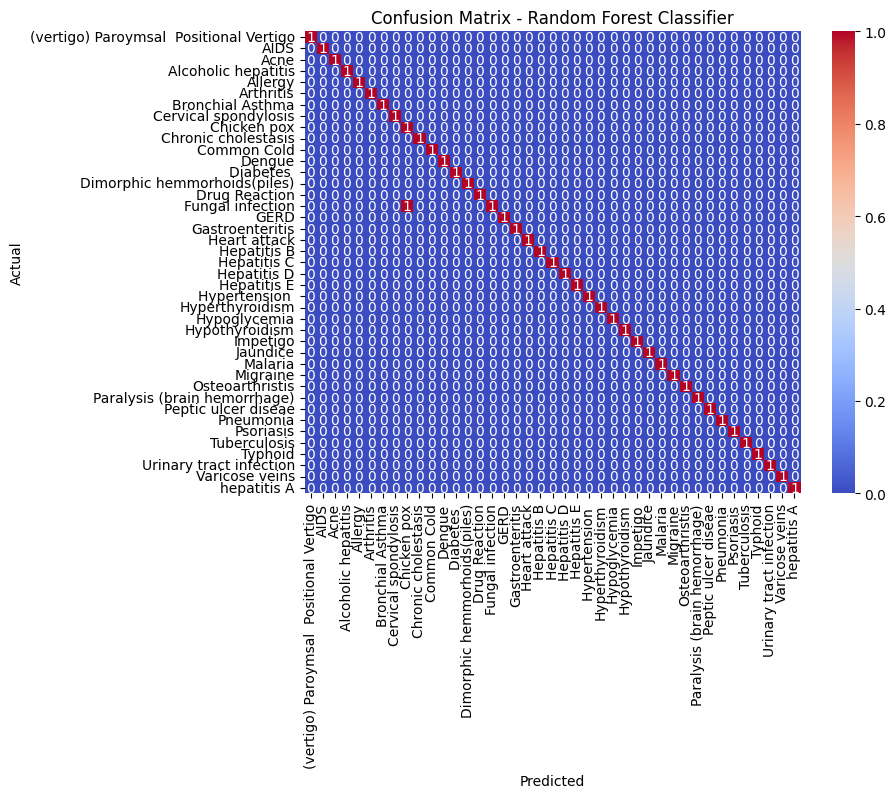


Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
  

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define features and target from the training data
X = data.drop(columns=["prognosis", "encoded_prognosis"], errors="ignore")  # Exclude encoded_prognosis
y = data["prognosis"]

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the test_data as it is for final testing
X_test = test_data.drop(columns=["prognosis", "encoded_prognosis"], errors="ignore")  # Exclude encoded_prognosis
y_test = test_data["prognosis"]

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

# Train and evaluate the Random Forest model
def train_and_evaluate(model, model_name, color_map="coolwarm"):
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train)) * 100
    val_acc = accuracy_score(y_val, model.predict(X_val)) * 100
    test_acc = accuracy_score(y_test, model.predict(X_test)) * 100
    print(f"{model_name} Accuracy on Training Data: {train_acc:.2f}%")
    print(f"{model_name} Accuracy on Validation Data: {val_acc:.2f}%")
    print(f"{model_name} Accuracy on Testing Data: {test_acc:.2f}%")

    # Confusion matrix for the test data
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=color_map, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification report for the test data
    print("\nClassification Report:\n")
    print(classification_report(y_test, preds, target_names=encoder.classes_))

# Instantiate and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_and_evaluate(rf_model, "Random Forest Classifier")



Training Naive Bayes Classifier...
Naive Bayes Classifier Accuracy on Training Data: 100.00%
Naive Bayes Classifier Accuracy on Validation Data: 100.00%
Naive Bayes Classifier Accuracy on Testing Data: 100.00%


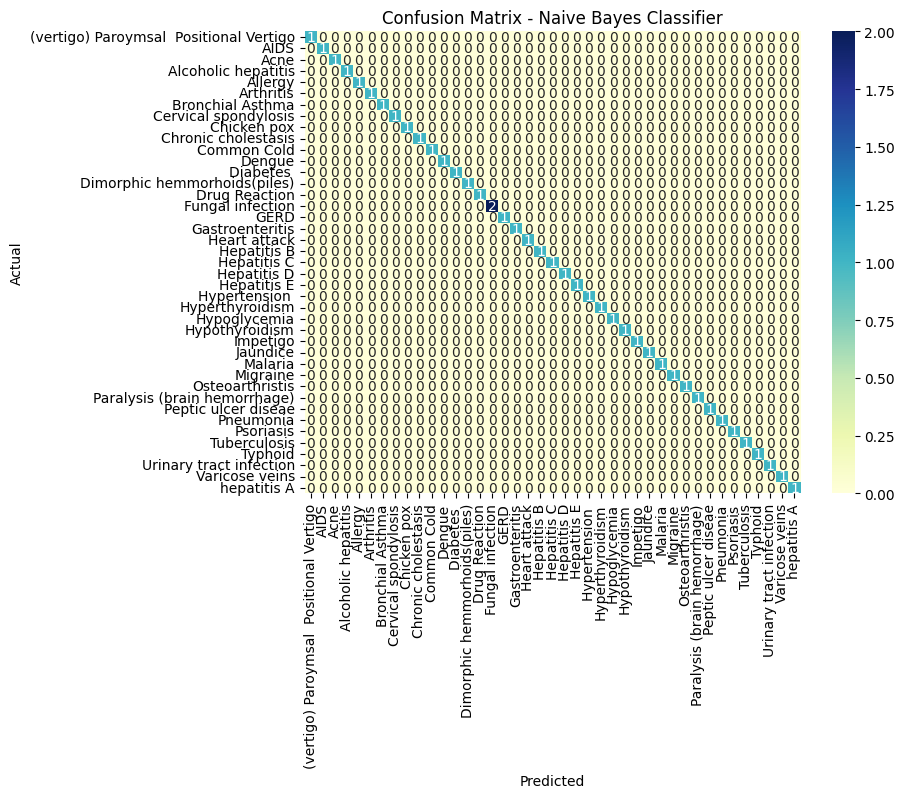


Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
  

In [45]:
# Import GaussianNB (Naive Bayes)
from sklearn.naive_bayes import GaussianNB

# Train and evaluate Naive Bayes with "YlGnBu" colormap
nb_model = GaussianNB()
train_and_evaluate(nb_model, "Naive Bayes Classifier", color_map="YlGnBu")



Training SVM Classifier...
SVM Classifier Accuracy on Training Data: 100.00%
SVM Classifier Accuracy on Validation Data: 100.00%
SVM Classifier Accuracy on Testing Data: 100.00%


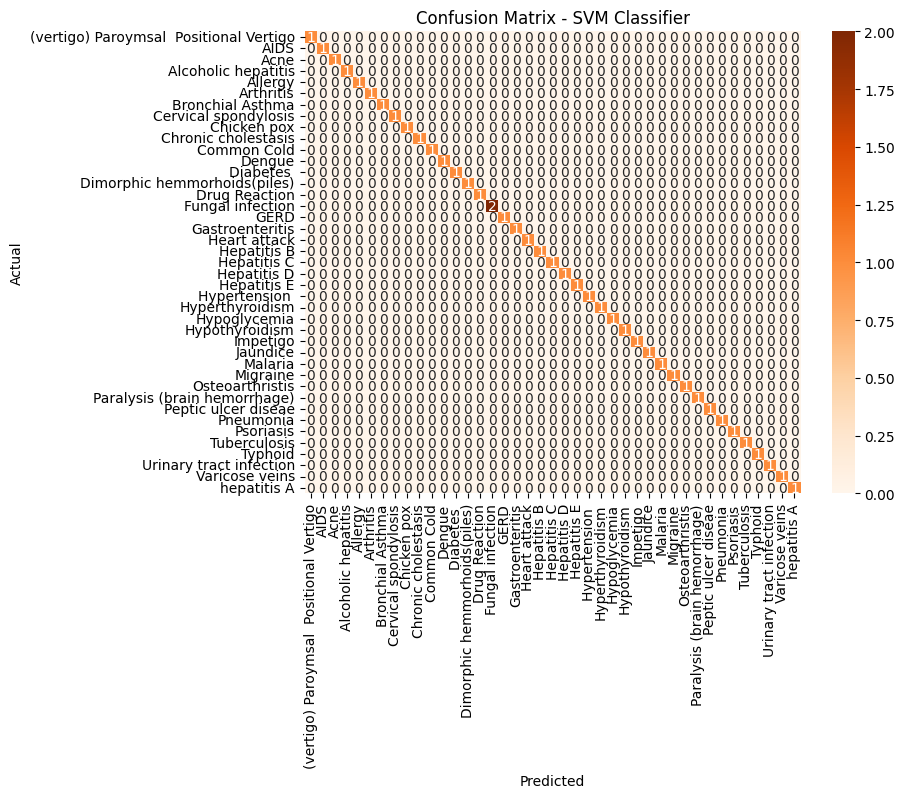


Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
  

In [46]:
# Import SVC (Support Vector Classifier)
from sklearn.svm import SVC

# Train and evaluate SVM with "Oranges" colormap
svm_model = SVC(random_state=42)
train_and_evaluate(svm_model, "SVM Classifier", color_map="Oranges")


Block 5: Prediction Function



In [51]:
from scipy import stats
import pandas as pd

# Function to predict disease based on symptoms
def predict_disease(symptoms):
    # Normalize column names (convert to lowercase and replace underscores with spaces)
    normalized_columns = [col.lower().replace("_", " ") for col in data.columns[1:-1]]  # Skip 'prognosis' and 'encoded_prognosis'
    input_data = [0] * len(X.columns)

    # For each symptom provided, mark the corresponding feature index as 1
    for symptom in symptoms.split(","):
        symptom = symptom.strip().lower()
        if symptom in normalized_columns:
            input_data[normalized_columns.index(symptom)] = 1
        else:
            print(f"Warning: Symptom '{symptom}' not recognized and ignored.")

    # Convert the input data into a DataFrame that matches the feature columns used during training
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Predictions from each model
    rf_pred = rf_model.predict(input_df)[0]  # Random Forest Prediction
    nb_pred = nb_model.predict(input_df)[0]  # Naive Bayes Prediction
    svm_pred = svm_model.predict(input_df)[0]  # SVM Prediction

    # Combine predictions using the mode (most common prediction)
    final_prediction = stats.mode([rf_pred, nb_pred, svm_pred], keepdims=True).mode[0]

    # Display predictions
    print("\nPrediction Results:")
    print(f"Random Forest Prediction: {encoder.classes_[rf_pred]}")
    print(f"Naive Bayes Prediction: {encoder.classes_[nb_pred]}")
    print(f"SVM Prediction: {encoder.classes_[svm_pred]}")
    print(f"Final Combined Prediction: {encoder.classes_[final_prediction]}")



Block 6: Test the Prediction Function



In [52]:
# Test the prediction function
predict_disease("Itching, Skin Rash, Nodal Skin Eruptions")
predict_disease("Cough, High Fever, Breathlessness")





Prediction Results:
Random Forest Prediction: Fungal infection
Naive Bayes Prediction: Fungal infection
SVM Prediction: Fungal infection
Final Combined Prediction: Fungal infection

Prediction Results:
Random Forest Prediction: Bronchial Asthma
Naive Bayes Prediction: Bronchial Asthma
SVM Prediction: Bronchial Asthma
Final Combined Prediction: Bronchial Asthma


In [ ]:
Interactive Pane to check out

In [31]:
from ipywidgets import Checkbox, HBox, interact

# Create checkboxes for each symptom
checkboxes = [Checkbox(value=False, description=symptom) for symptom in symptoms]

# Organize checkboxes horizontally using HBox
checkbox_layout = HBox(checkboxes)

# Function to make prediction
def predict_disease(**kwargs):
    # Create a feature vector of length 133, initialized with 0
    input_data = [0] * len(symptoms)

    # Update the vector with 1 for each selected symptom
    for symptom in kwargs:
        if kwargs[symptom]:  # If the symptom is selected
            input_data[symptoms.index(symptom)] = 1

    # Convert the input data into a pandas DataFrame with the same column names as the training data
    input_df = pd.DataFrame([input_data], columns=symptoms)

    # Predict the disease using the trained model
    prediction = model.predict(input_df)
    print(f"Predicted Disease: {prediction[0]}")

# Display the checkbox layout horizontally
interact(predict_disease, **{symptom: checkbox for symptom, checkbox in zip(symptoms, checkboxes)});


interactive(children=(Checkbox(value=False, description='itching'), Checkbox(value=False, description='skin_ra…